## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape)

(545, 13)


In [5]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [19]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum() # there is 0 missing values in the dataset so we can't replace anything

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [25]:
#5 Prepare  X (independent variables) and y (dependent variable)
y = df['price'] #
x = df.drop(columns = ['price'])
print("Dependent variable", y)
print("Independent variable",x)

Dependent variable 0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64
Independent variable      area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1     

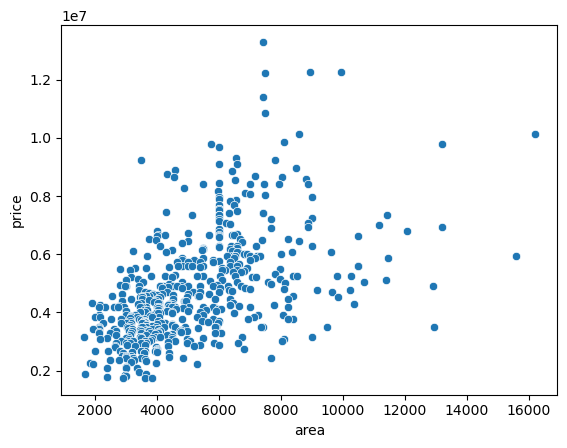

In [39]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x = df['area'],y = df['price'])
plt.show()

In [ ]:
#7 Encoding categorical data in X

In [43]:
#8  Avoiding the Dummy Variable Trap
df_encoded = pd.get_dummies(df, columns=['area'],drop_first=True)
print(df_encoded)

        price  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000         4          2        3      yes        no       no   
1    12250000         4          4        4      yes        no       no   
2    12250000         3          2        2      yes        no      yes   
3    12215000         4          2        2      yes        no      yes   
4    11410000         4          1        2      yes       yes      yes   
..        ...       ...        ...      ...      ...       ...      ...   
540   1820000         2          1        1      yes        no      yes   
541   1767150         3          1        1       no        no       no   
542   1750000         2          1        1      yes        no       no   
543   1750000         3          1        1       no        no       no   
544   1750000         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking  ... area_11175 area_11410  \
0                no     

In [47]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

# Min-Max Scaling (Normalization)
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

# Display scaled datasets
print("Standardized Data (Z-score):\n", df_standardized.head())
print("\nMin-Max Scaled Data (0 to 1):\n", df_normalized.head())


Standardized Data (Z-score):
       price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  4.566365  1.046726  1.403419   1.421812  1.378217      yes        no   
1  4.004484  1.757010  1.403419   5.405809  2.532024      yes        no   
2  4.004484  2.218232  0.047278   1.421812  0.224410      yes        no   
3  3.985755  1.083624  1.403419   1.421812  0.224410      yes        no   
4  3.554979  1.046726  1.403419  -0.570187  0.224410      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea furnishingstatus  
0       no              no             yes  1.517692      yes        furnished  
1       no              no             yes  2.679409       no        furnished  
2      yes              no              no  1.517692      yes   semi-furnished  
3      yes              no             yes  2.679409      yes        furnished  
4      yes              no             yes  1.517692       no        furnished  

Min-Max Scaled Data (0 to 1):
  

In [51]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price'])  # Replace 'Price' with the actual target column in your dataset
y = df['price']  # Target variable

# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Display dataset sizes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (381, 12)
X_test shape: (164, 12)
y_train shape: (381,)
y_test shape: (164,)


In [ ]:
#11 Fitting Multiple Linear Regression to the Training

In [ ]:
#12 Predict on the train set and calculate the error = y_pred - y_train

In [ ]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

In [ ]:
#14  Predic on the test set

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

In [ ]:
#16 Print Mean Squared Error and R Squared Value

In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)